In [1]:
# Importing libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.image as mpimg

## Data 1: Housing sales data

In [17]:
# Importing data - home sale prices by block in Brooklyn for the last 15 years 
raw_data = pd.read_csv('/Volumes/Work2/work/python/projects/Brooklyn sales/brooklyn_sales_map.csv')

In [19]:
# Looking at the dataset
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390883 entries, 0 to 390882
Data columns (total 28 columns):
sale_id                    390883 non-null int64
borough                    390883 non-null int64
neighborhood               390883 non-null object
building_class_category    390800 non-null object
building_class             383949 non-null object
address                    390882 non-null object
zip_code                   390883 non-null int64
total_units                390883 non-null int64
land_sqft                  390883 non-null float64
gross_sqft                 390883 non-null float64
year_built                 390883 non-null int64
building_class_at_sale     390883 non-null object
sale_price                 390883 non-null float64
sale_date                  390883 non-null object
year_of_sale               390883 non-null int64
Borough                    303728 non-null object
SchoolDist                 303688 non-null float64
FireComp                   303480 non-nul

# Data 2: NYPD - Motor vehicles collisions data

In [65]:
# Importing data - collision data for last 6 years
raw_data2 = pd.read_csv('/Volumes/Work2/work/python/projects/Brooklyn sales/NYPD_Motor_Vehicle_Collisions.csv')

/Users/user/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [66]:
raw_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1251734 entries, 0 to 1251733
Data columns (total 29 columns):
DATE                             1251734 non-null object
TIME                             1251734 non-null object
BOROUGH                          892796 non-null object
ZIP CODE                         892697 non-null object
LATITUDE                         1034255 non-null float64
LONGITUDE                        1034255 non-null float64
LOCATION                         1034255 non-null object
ON STREET NAME                   1005204 non-null object
CROSS STREET NAME                931378 non-null object
OFF STREET NAME                  198556 non-null object
NUMBER OF PERSONS INJURED        1251734 non-null int64
NUMBER OF PERSONS KILLED         1251734 non-null int64
NUMBER OF PEDESTRIANS INJURED    1251734 non-null int64
NUMBER OF PEDESTRIANS KILLED     1251734 non-null int64
NUMBER OF CYCLIST INJURED        1251734 non-null int64
NUMBER OF CYCLIST KILLED         125173

# Observations using Tableau
### While analyzing the above 2 datasets in Tableau, I found a really interesting observation that housing price follows the trend of how many Motorist get injured in that area. You can find my Tableau file here : https://github.com/anujjain00150/Housing-sales-price-prediction
### Visualizing the observation found in Tableau.

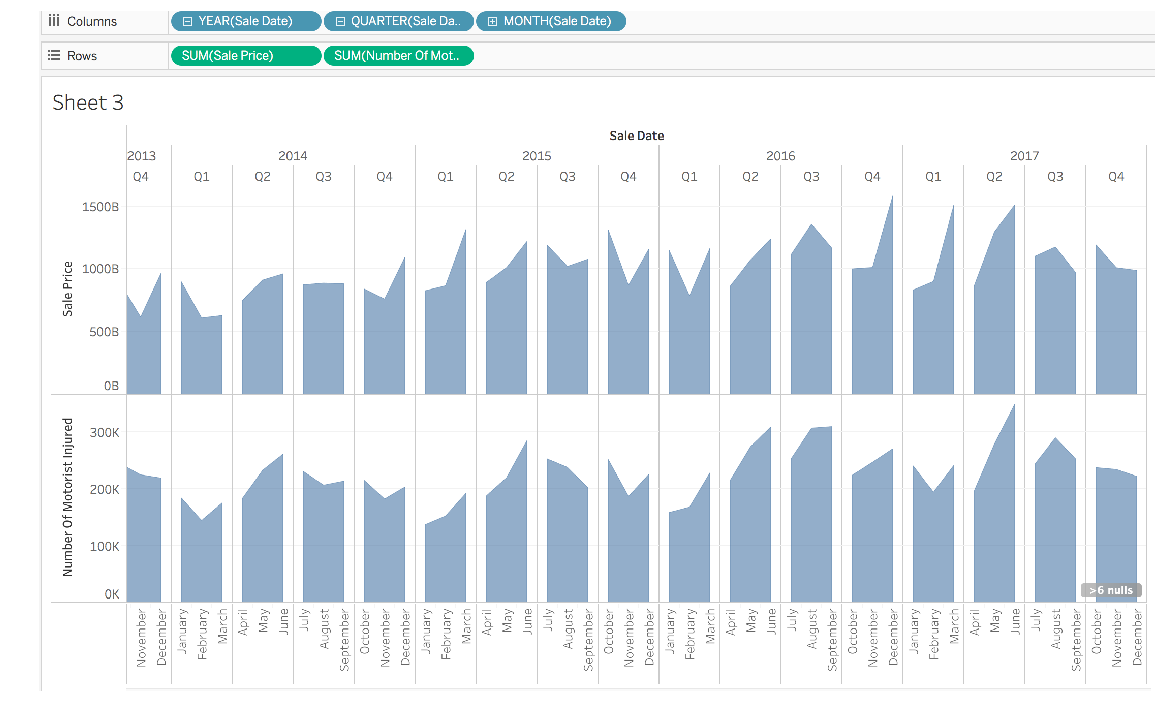

In [68]:
plt.figure(figsize=(20,15))
img = mpimg.imread('/Users/user/Desktop/' +'housing_motor.png')
plt.axis('off')
plt.imshow(img)
plt.show()

In [ ]:
# Analysis: It can be observed that whenever there is a change in # of Motorist injured, there is change 
# in the sale price of houses in the same nature.

### Another interesting observation is found that when a building is near a school, prices are noticeably high

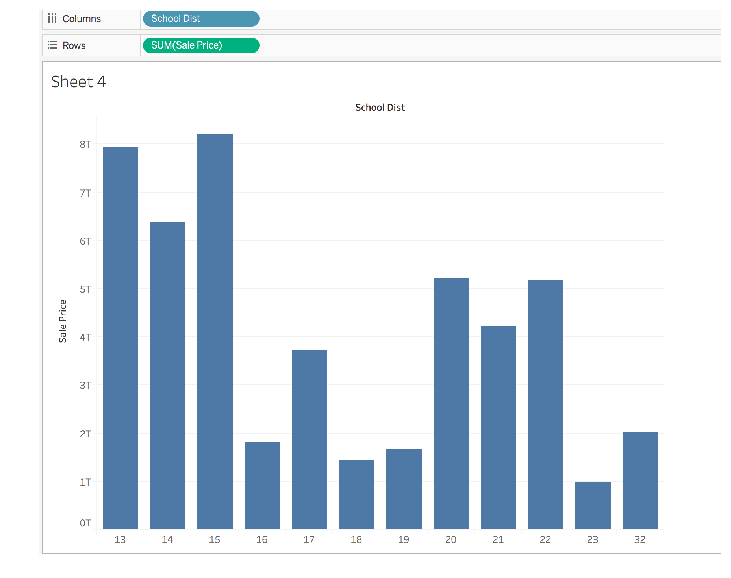

In [70]:
plt.figure(figsize=(15,10))
img = mpimg.imread('/Users/user/Desktop/' +'school_dist.png')
plt.axis('off')
plt.imshow(img)
plt.show()

# Analyzing some other features with a sale price of a house

### 1. year_of_sale

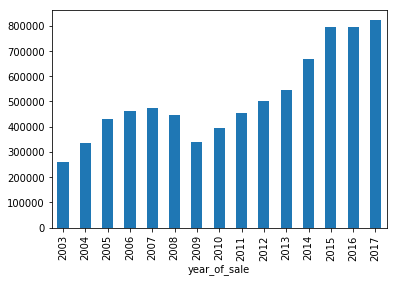

In [16]:
raw_data.groupby('year_of_sale').sale_price.apply(lambda x: x.mean()).plot(kind='bar')

### 2. Total number of units

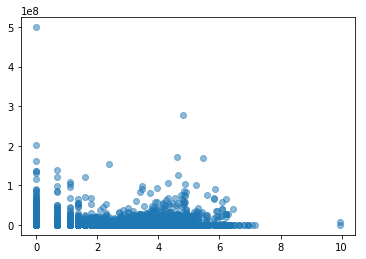

In [49]:
# taking log to avoid the effect of outliers
log_unit = np.log(raw_data.total_units[raw_data.total_units != 0])
plt.scatter(x=log_unit, y=raw_data.sale_price[raw_data.total_units != 0], alpha=0.5)

In [50]:
# not a lot of using info in this

### 3. year_built

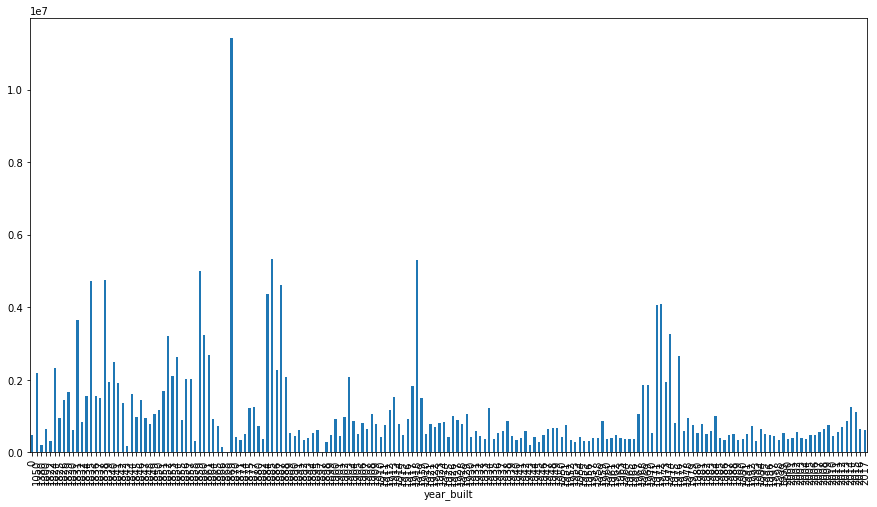

In [53]:
raw_data.groupby('year_built').sale_price.apply(lambda x: x.mean()).plot(kind='bar', figsize=(15,8))

In [56]:
print('range of year built:\t'+str(raw_data.year_built.min())+'-'+str(raw_data.year_built.max()))

range of year built:	0-2017


In [57]:
# It's clear from the plot that historic building has really high prices as compared to building built after the
# 19th century 

### 4. land square feet

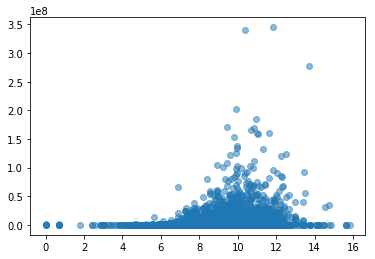

In [62]:
# taking log to avoid the effect of outliers
log_sqrt = np.log(raw_data.land_sqft[raw_data.land_sqft != 0])
plt.scatter(x=log_sqrt, y=raw_data.sale_price[raw_data.land_sqft != 0], alpha=0.5)

In [63]:
# Analysis: With the increase in area there is obvious increase in the price of property

## Using the nontirival analysis data of a number of motorists injured and other features available from the housing data, we can predict how the prices of the NYC area can change.